## Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml, load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Load Example Dataset (Option 1)
* MNIST dataset
* 70000 images
* 28$\times$28 pixels
* Pixel intensity: 0 to 255

In [34]:
# --- Option 1: Use MNIST dataset ---
# Fetch MNIST from OpenML (each image is 28x28 pixels, flattened to 784 features)
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# Due to computational constraints with t-SNE, sample a subset (e.g., 2000 examples)
np.random.seed(42)
subset_idx = np.random.choice(X.shape[0], size=2000, replace=False)
X_subset = X.values[subset_idx]
y_subset = y.values[subset_idx]
dataset = "MNIST"

## Load Example Dataset (Option 2)
* Digits in sklearn
* 1797 images
* 8$\times$8 pixels
* Pixel intensity: 0 to 16

In [3]:
# --- Option 2: Use the digits dataset ---
digits = load_digits()
X_subset = digits.data
y_subset = digits.target
dataset = "sklearn digits"
X_subset.shape

(1797, 64)

## PCA
First, use PCA to reduce the dimensionality to a manageable level (e.g., 50 components)

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

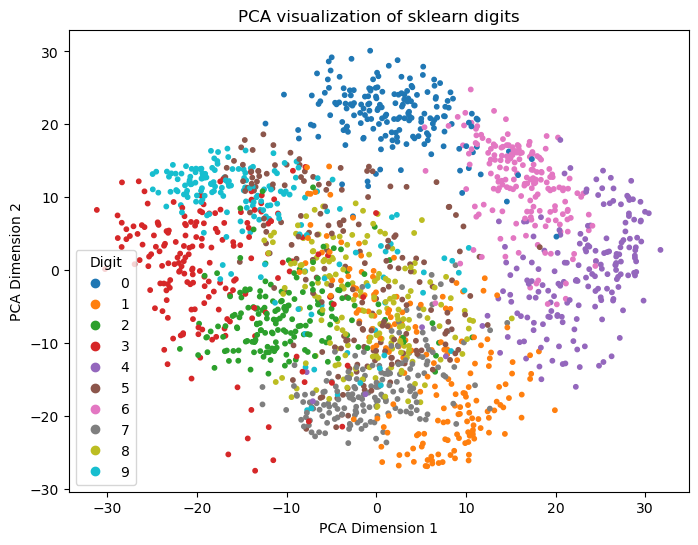

In [31]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset, cmap='tab10', s=10)
plt.title(f"PCA visualization of {dataset}")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(*scatter.legend_elements(), title="Digit")
plt.show()

## TSNE
Next, apply t-SNE to further reduce the data to 2 dimensions for visualization

In [37]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

## Plot the 2D t-SNE embedding

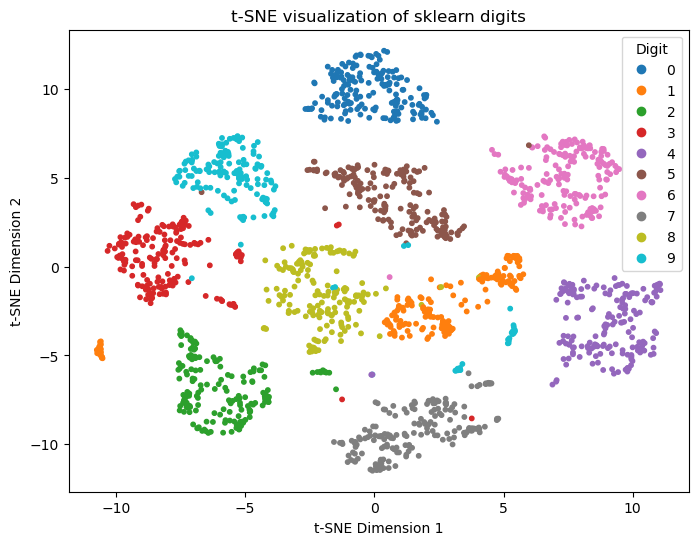

In [38]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10', s=10)
plt.title(f"t-SNE visualization of {dataset}")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(*scatter.legend_elements(), title="Digit")
plt.show()